In [1]:
import pandas as pd 
from math import sqrt
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


# La régression polynomiale

In [2]:
data = pd.read_csv('Data/ozone.csv', sep=',')
y = data["MaxO3"]
data= data[
           ['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9',
            'Vx12', 'Vx15', 'MaxO3v']
]

def normalization(dataToNormalize):
    columns = dataToNormalize.columns
    for col in columns:
        x = dataToNormalize[[col]].values.astype(float)
        standard_normalization = preprocessing.StandardScaler()
        res = standard_normalization.fit_transform(x)
        dataToNormalize[col]=res
        
normalization(data)


In [3]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.20)

In [4]:
polynomial_features = PolynomialFeatures(degree=2)

In [5]:
poly_regression_alg = LinearRegression()

In [6]:
model = Pipeline([
                ("polynomial_features", polynomial_features),
                ("linear_regression", poly_regression_alg)
            ])

In [7]:
model.fit(x_train, y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [8]:
train_predictions = model.predict(x_train)
print(f"RMSE = {round(sqrt(mean_squared_error(y_train, train_predictions)),2)}")
print(f"R2_score = {round(r2_score(y_train, train_predictions),2)}")

RMSE = 17.33
R2_score = 0.61


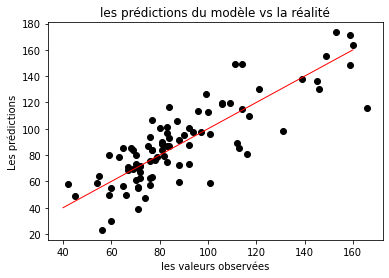

In [9]:
plt.scatter(y_train, train_predictions,  color='black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()

In [10]:
test_predictions = model.predict(x_test)
print(f"RMSE = {round(sqrt(mean_squared_error(y_test, test_predictions)),2)}")
print(f"R2_score = {round(r2_score(y_test, test_predictions),2)}")

RMSE = 44.8
R2_score = -1.34


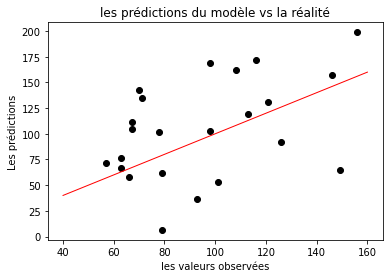

In [11]:
plt.scatter(y_test, test_predictions,  color='black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()
 

# Le problème du surapprentissage

In [12]:
polynomial_features_2 = PolynomialFeatures(degree=6)
poly_regression_alg_2 = LinearRegression()
model_2 = Pipeline([
                ("polynomial_features", polynomial_features_2),
                ("linear_regression", poly_regression_alg_2)
            ])
model_2.fit(x_train, y_train)
train_predictions_2 = model_2.predict(x_train)
print(f"RMSE = {round(sqrt(mean_squared_error(y_train, train_predictions_2)),2)}")
print(f"R2_score = {round(r2_score(y_train, train_predictions_2),2)}")

RMSE = 0.0
R2_score = 1.0


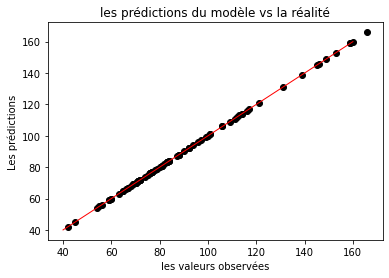

In [13]:
plt.scatter(y_train, train_predictions_2,  color='black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()

In [14]:
test_predictions_2 = model_2.predict(x_test)
print(f"RMSE = {round(sqrt(mean_squared_error(y_test, test_predictions_2)),2)}")
print(f"R2_score = {round(r2_score(y_test, test_predictions_2),2)}")

RMSE = 212.8
R2_score = -51.68


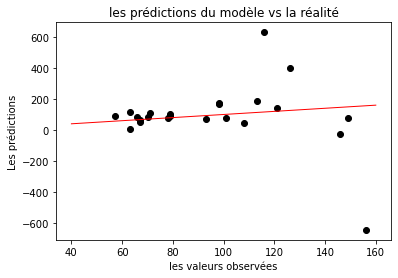

In [15]:
plt.scatter(y_test, test_predictions_2,  color='black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()